In [43]:
# Load data
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("https://raw.githubusercontent.com/dataprofessor/data/master/delaney_solubility_with_descriptors.csv")

# Data Preparation
# Data Seperation as X and y
y = df["logS"]
X = df.drop("logS", axis=1)

# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# # Linear Regression
# Model Building
lr = LinearRegression()
lr.fit(X_train, y_train)

# Making predictions
y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)

# Evaluate Model performance
lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

# # Random Forest
# Model Building
rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(X_train, y_train)

# Model predictions
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

# Evaluate Model performance
rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [44]:
lr_results = pd.DataFrame(["Linear Regression", lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ["Methods", "Train MSE", "Train R2", "Test MSE", "Test R2"]
rf_results = pd.DataFrame(["Random Forest", rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ["Methods", "Train MSE", "Train R2", "Test MSE", "Test R2"]
df_models = pd.concat([lr_results, rf_results], axis=0).reset_index(drop=True)
df_models

,Methods,Train MSE,Train R2,Test MSE,Test R2
0,Linear Regression,1.007536,0.764505,1.020695,0.789162
1,Random Forest,1.028228,0.759669,1.407688,0.709223


Text(0.5, 0, 'Experimental LogS')

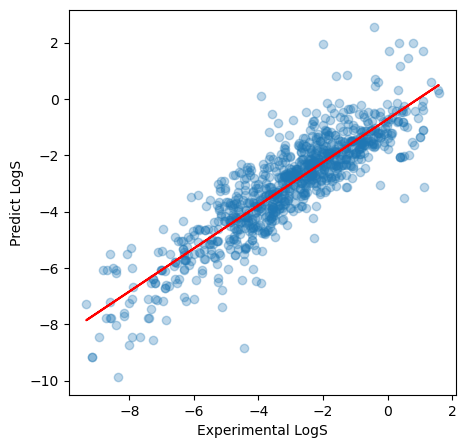

In [46]:
# Data Visualisation of Prediction Results
plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_lr_train_pred, alpha=0.3)

z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), "#ff0000")
plt.ylabel("Predict LogS")
plt.xlabel("Experimental LogS")